In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, BatchNormalization, MaxPooling2D, Input
from keras.utils import np_utils
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
from skimage.transform import resize


In [20]:
face_images_path = os.path.join('data', 'face_images.npz')
keypoints_dir = os.path.join('data', 'facial_keypoints.csv') 
print(face_images_path)


data/face_images.npz


In [21]:
images = np.load(face_images_path)['face_images']

In [22]:
facial_keypoints = pd.read_csv(keypoints_dir)

In [5]:
images.shape[2]


7049

In [116]:
facial_keypoints[:10]


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,52.468486,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,46.855087,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,47.891883,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,48.069760,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,48.995077,54.341538,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538


In [23]:
landmarks = np.array(facial_keypoints)
landmarks[10:]

array([[65.23018868, 34.34264151, 28.80271698, ..., 65.26007547,
        46.20679245, 81.69781132],
       [66.7376    , 39.8864    , 30.2704    , ..., 72.7792    ,
        47.7888    , 94.588     ],
       [66.57473684, 37.308     , 30.44526316, ..., 68.35578947,
        49.63894737, 83.88      ],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ...,         nan,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ...,         nan,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ...,         nan,
        45.90048   , 82.7730963 ]])

In [7]:
landmarks.shape[0]

7049

In [24]:
def isNaN(num):
    return num != num


In [25]:
# Clean dataset by removing incomplete landmarks and images
new_images = list()
new_landmarks = list()
for x in range(landmarks.shape[0]):
    incomplete = False
    for val in landmarks[x]:
        if isNaN(val):
            incomplete = True
            break
    if not incomplete:
        new_images.append(images[:,:, x])
        new_landmarks.append(landmarks[x])


In [26]:
new_images = np.array(new_images)

In [9]:
new_images.shape

(2140, 96, 96)

In [27]:
def display_image(image):
    fig = plt.figure
    plt.imshow(image, cmap='gray')


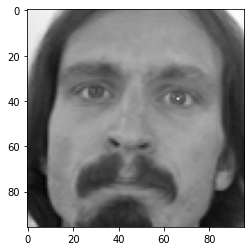

In [28]:

image = images[:, :, 0]  # plot the sample
image[39, 66] = 255

fig = plt.figure
plt.imshow(image, cmap='gray')
# plt.show()


In [27]:
image

array([[[238, 238, 238],
        [236, 236, 236],
        [237, 237, 237],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[235, 235, 235],
        [238, 238, 238],
        [236, 236, 236],
        ...,
        [249, 249, 249],
        [250, 250, 250],
        [251, 251, 251]],

       [[237, 237, 237],
        [236, 236, 236],
        [237, 237, 237],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [250, 250, 250]],

       ...,

       [[186, 186, 186],
        [183, 183, 183],
        [181, 181, 181],
        ...,
        [ 52,  52,  52],
        [ 57,  57,  57],
        [ 60,  60,  60]],

       [[189, 189, 189],
        [188, 188, 188],
        [207, 207, 207],
        ...,
        [ 61,  61,  61],
        [ 69,  69,  69],
        [ 78,  78,  78]],

       [[191, 191, 191],
        [184, 184, 184],
        [184, 184, 184],
        ...,
        [ 70,  70,  70],
        [ 75,  75,  75],
        [ 90,  90,  90]]

In [29]:
def plot_facial_landmark(image, landmarks):
    Object = lambda **kwargs: type("Object", (), kwargs)
    for x in range(0, len(landmarks), 2):
        point = [int(landmarks[x]),int(landmarks[x + 1])]
        point = Object(x=int(landmarks[x]), y=int(landmarks[x + 1]))
        # print(point.x)
        image[point.y, point.x] = 255
    return image


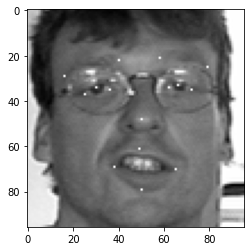

In [14]:
sample_idx = 1000
plotted_image = plot_facial_landmark(images[:, :, sample_idx], landmarks[sample_idx])  # plot the sample
# print(plotted_image)
fig = plt.figure
plt.imshow(plotted_image, cmap='gray')


In [30]:
np_image = np.array(images)
np_facial_keypoints = np.array(facial_keypoints)

In [61]:
np_image.shape

(96, 96, 7049)

In [31]:
def train_test_split(train_percentage, images, landmarks):
    data_len = images.shape[0]
    train_val = int(data_len * (train_percentage / 100))
    train_images = [0]*train_val
    train_landmarks = [0]*train_val
    test_images = [0]* (data_len -train_val)
    test_landmarks = [0] * (data_len - train_val)
    i = 0
    for x in range(data_len):
        if x < train_val:
            train_images[x] = images[x]
            train_landmarks[x] = landmarks[x]
        else:
            test_images[i] = images[x]
            test_landmarks[i] = landmarks[x]
            i += 1
    return (train_images, train_landmarks), (test_images, test_landmarks)


In [32]:
#Convert all images to RGB
def convert_to_rgb(image):
    image = np.array(image, np.uint8)
    return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

In [33]:
#Convert all images to RGB
def convert_to_gray_scale(image):
    image = np.array(image, np.uint8)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


In [19]:
rgb_images = [None]*new_images.shape[0]
for x in range(len(new_images)):
    rgb_images[x] = convert_to_rgb(new_images[x])

new_images = np.array(rgb_images)

In [37]:
new_images.shape

(2140, 96, 96, 3)

In [34]:
(train_images, train_landmarks), (test_images, test_landmarks) = train_test_split(90, new_images, new_landmarks)

In [35]:
# print(len(train_images))
#normalize data
x_train = np.array(train_images) / 255
y_train = np.array(train_landmarks) / 96
x_test = np.array(test_images) / 255
y_test = np.array(test_landmarks) / 96


In [54]:
y_train

array([[0.68784962, 0.40627368, 0.31486466, ..., 0.75974436, 0.4492782 ,
        0.88006015],
       [0.67013475, 0.36427163, 0.31197163, ..., 0.73194326, 0.47362411,
        0.89041844],
       [0.67767763, 0.36364211, 0.32191447, ..., 0.73116447, 0.49244737,
        0.81936842],
       ...,
       [0.67933864, 0.33137406, 0.33964466, ..., 0.78913285, 0.57963354,
        0.82364845],
       [0.69836304, 0.38485829, 0.2684898 , ..., 0.77737496, 0.55803899,
        0.86224849],
       [0.68532849, 0.38941204, 0.28370773, ..., 0.8076986 , 0.48316977,
        0.8244582 ]])

In [60]:
y_test.shape
y_test[428 - 1]
y_train[428 - 1]
# isNaN(y_test[1404-1][3])


array([[0.67498214],
       [0.36375   ],
       [0.31585714],
       [0.37439286],
       [0.61911905],
       [0.37705357],
       [0.74414286],
       [0.37705357],
       [0.37970238],
       [0.382375  ],
       [0.2520119 ],
       [0.38769048],
       [0.61645833],
       [0.28660655],
       [0.81064881],
       [0.31054762],
       [0.41694643],
       [0.29458929],
       [0.1934881 ],
       [0.31852976],
       [0.51004762],
       [0.52070238],
       [0.667     ],
       [0.71223214],
       [0.35310119],
       [0.72819643],
       [0.52335119],
       [0.68829167],
       [0.52335119],
       [0.76809524]])

In [36]:
im = plot_facial_landmark(x_test[428 - 1], y_test[428 - 1])
display_image(im)

IndexError: index 427 is out of bounds for axis 0 with size 214

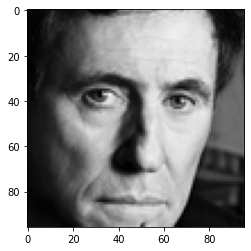

In [37]:
display_image(test_images[0])


In [4]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False,
                   input_shape=(96, 96, 3))
base_model.trainable = False  # Not trainable weights
base_model.summary()


2022-03-12 23:35:46.799322: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


58900480/58889256 [==============================] - 216s 4us/step


In [5]:
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [38]:
def EncoderMiniBlock(inputs, n_filters=32, dropout_prob=0.3, max_pooling=True):
    """
    This block uses multiple convolution layers, max pool, relu activation to create an architecture for learning. 
    Dropout can be added for regularization to prevent overfitting. 
    The block returns the activation values for next layer along with a skip connection which will be used in the decoder
    """
    # Add 2 Conv Layers with relu activation and HeNormal initialization using TensorFlow
    # Proper initialization prevents from the problem of exploding and vanishing gradients
    # 'Same' padding will pad the input to conv layer such that the output has the same height and width (hence, is not reduced in size)
    conv = Conv2D(n_filters,
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(inputs)
    conv = Conv2D(n_filters,
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(conv)

    # Batch Normalization will normalize the output of the last layer based on the batch's mean and standard deviation
    conv = BatchNormalization()(conv, training=False)

    # In case of overfitting, dropout will regularize the loss and gradient computation to shrink the influence of weights on output
    if dropout_prob > 0:
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)

    # Pooling reduces the size of the image while keeping the number of channels same
    # Pooling has been kept as optional as the last encoder layer does not use pooling (hence, makes the encoder block flexible to use)
    # Below, Max pooling considers the maximum of the input slice for output computation and uses stride of 2 to traverse across input image
    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
    else:
        next_layer = conv

    # skip connection (without max pooling) will be input to the decoder layer to prevent information loss during transpose convolutions
    skip_connection = conv

    return next_layer, skip_connection


In [39]:
input_size = (96, 96, 1)
n_filters = 32
n_classes = 30
# Input size represent the size of 1 image (the size used for pre-processing)
inputs = Input(input_size)

# Encoder includes multiple convolutional mini blocks with different maxpooling, dropout and filter parameters
# Observe that the filters are increasing as we go deeper into the network which will increasse the # channels of the image
cblock1 = EncoderMiniBlock(inputs, n_filters, dropout_prob=0, max_pooling=True)
cblock2 = EncoderMiniBlock(
    cblock1[0], n_filters*2, dropout_prob=0, max_pooling=True)
cblock3 = EncoderMiniBlock(
    cblock2[0], n_filters*4, dropout_prob=0, max_pooling=True)
cblock4 = EncoderMiniBlock(
    cblock3[0], n_filters*8, dropout_prob=0.3, max_pooling=True)
cblock5 = EncoderMiniBlock(
    cblock4[0], n_filters*16, dropout_prob=0.3, max_pooling=False)

bb = Flatten()(cblock5[0])
bb = Dense(120, activation='relu')(bb)
bb = Dense(60, activation='relu')(bb)
bb = Dense(30, activation='relu')(bb)
# custom_model = Flatten()
# custom_model = Dense(120, activation='relu')(custom_model)
# custom_model = Dense(60, activation='relu')(custom_model)
# custom_model = Dense(30, activation='sigmoid')(custom_model)
# conv_1 = Conv2D(256, kernel_size=(1, 1), strides=2, activation='relu')
# batch_1 =BatchNormalization()
# # convolutional layer
# conv_2 = Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu')
# conv_3 = Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu')
# flatten_layer = Flatten()
# dense_layer_1 = Dense(120, activation='relu')
# dense_layer_2 = Dense(60, activation='relu')
# prediction_layer = Dense(30, activation='sigmoid')
# # model = Sequential([base_model,custom_model])
# model = Sequential([
#     base_model,
#     conv_1,
#     flatten_layer,
#     dense_layer_1,
#     dense_layer_2,
#     prediction_layer
# ])
# compiling the sequential model
# Define the model
model = tf.keras.Model(inputs=inputs, outputs=bb)
model.compile(loss='mse', metrics=['accuracy'],
              optimizer='adam')
model.summary()


2022-04-30 22:12:44.097595: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        18496 

In [40]:
model.fit(x_train, y_train, epochs=25, batch_size=100, validation_data=(x_test, y_test))


Epoch 1/25
20/20 [==============================] - 42s 2s/step - loss: 0.3474 - accuracy: 0.0265 - val_loss: 0.1596 - val_accuracy: 0.0000e+00
Epoch 2/25
20/20 [==============================] - 41s 2s/step - loss: 0.1368 - accuracy: 0.1137 - val_loss: 0.1378 - val_accuracy: 0.2056
Epoch 3/25
20/20 [==============================] - 41s 2s/step - loss: 0.1174 - accuracy: 0.3479 - val_loss: 0.1235 - val_accuracy: 0.3505
Epoch 4/25
20/20 [==============================] - 44s 2s/step - loss: 0.1142 - accuracy: 0.6817 - val_loss: 0.1206 - val_accuracy: 0.3832
Epoch 5/25
20/20 [==============================] - 49s 2s/step - loss: 0.1141 - accuracy: 0.7191 - val_loss: 0.1216 - val_accuracy: 0.3832
Epoch 6/25
20/20 [==============================] - 46s 2s/step - loss: 0.1140 - accuracy: 0.7310 - val_loss: 0.1209 - val_accuracy: 0.3832
Epoch 7/25
20/20 [==============================] - 46s 2s/step - loss: 0.1140 - accuracy: 0.7279 - val_loss: 0.1208 - val_accuracy: 0.3832
Epoch 8/25
20/20

In [45]:
from skimage.io import imread
im = imread(os.path.join('data' ,'test_face.jpg'))

In [42]:
im = convert_to_rgb(im)

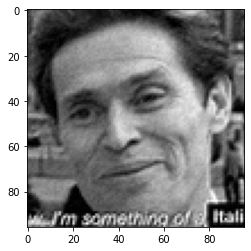

In [46]:
display_image(im)

In [47]:
test_image = im/255 #x_test[428 - 400].copy()  # x_test[100].copy()
test_output = model.predict(np.array([test_image]), verbose=0)
print(test_output)


[[0.5987598  0.         0.         0.36337936 0.         0.3584176
  0.         0.34683314 0.         0.         0.22193196 0.
  0.         0.         0.7460752  0.         0.374542   0.
  0.15018325 0.         0.4502951  0.5154489  0.5971059  0.7088108
  0.         0.         0.42815048 0.67544    0.         0.7688734 ]]


In [115]:
sample = 101
test_image = x_train[sample].copy()  # x_test[100].copy()
# rgb_test_img = convert_to_rgb(test_image) # x_test[]
test_output = model.predict(np.array([test_image]), verbose=0)
print(test_output)


[[0.70135945 0.38226262 0.32155746 0.387382   0.6200256  0.3913921
  0.75558436 0.40546092 0.37003466 0.37464023 0.24560463 0.40033296
  0.62734973 0.29459646 0.81268764 0.32316613 0.4106264  0.31506875
  0.16331062 0.31884137 0.5360964  0.59084415 0.63876647 0.8296844
  0.3577819  0.83528394 0.5198546  0.8053267  0.51379555 0.86616504]]


In [122]:
test_image = test_image * 255
test_output = test_output * 96
test_output

array([[61.947544, 36.71978 , 35.40818 , 41.941006, 54.507282, 39.800293,
        67.75356 , 35.342903, 36.001934, 37.7616  , 28.625444, 42.164146,
        58.291763, 28.078018, 70.47866 , 30.722134, 39.20042 , 32.85132 ,
        20.580425, 39.153023, 49.23571 , 59.42768 , 61.944275, 71.296295,
        40.55945 , 73.07842 , 53.491848, 73.18001 , 49.90619 , 75.59566 ]],
      dtype=float32)

In [362]:
test_output[0][0]


array([[59.003185, 17.998774, 41.729874, 22.37576 , 33.170273, 25.223665,
        41.27445 , 32.275845, 17.83748 , 15.789961, 16.824432, 49.331875,
        62.890816, 20.791447, 82.864044, 20.138113, 31.757568, 27.980078,
        21.720055, 35.33327 , 60.269737, 38.65662 , 66.32322 , 56.9824  ,
        39.15485 , 85.0534  , 54.10695 , 47.030872, 44.381382, 54.00466 ]],
      dtype=float32)

In [48]:
#plot original
test_image = convert_to_gray_scale(test_image)
original_plotted_image = plot_facial_landmark(test_image.copy(), y_train[sample] * 96)
display_image(original_plotted_image)


error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [50]:
#plot predicted
# test_image = convert_to_gray_scale(test_image)
test_plotted_image = plot_facial_landmark(test_image.copy(), test_output[0])
display_image(test_plotted_image)

IndexError: index 152 is out of bounds for axis 1 with size 96

In [70]:
test_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
import cv2
x = 77
y = 55
h = 191
w = 213
image = cv2.imread('data/actors/0_61_benicio_del_toro.jpg')
image = np.array(image, np.uint8)
im = resize(image, (140, 54), preserve_range=True)



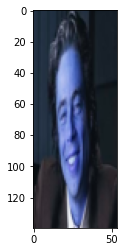

In [6]:
display_image(im)

In [ ]:
cv2.rectangle(image, (x, y), (w, h), (0, 0, 255), 2)
# show thresh and result
cv2.imshow("bounding_box", image)
cv2.waitKey(30000)
cv2.destroyAllWindows()
# display_image(image)
